
# <center>Soil-based Plant Recommendations</center>

#### Tentang Notebook
Dalam notebook ini, dilakukan data processing dengan mengidentifikasi anomali dari data (null value, outlier, dll). Kemudian akan dihasilkan statistik dan visualiasi untuk tahap EDA.

### Import packages

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

## Read Data

In [161]:
df1 = pd.read_csv("../data-raw/Crop_recommendation.csv")

df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Insights

In [162]:
df1.shape

(2200, 8)

In [163]:
df1.columns.values 

array(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'label'], dtype=object)

In [164]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [165]:
df1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Understanding Target variable

In [166]:
df1.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [167]:
df1.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='label'>

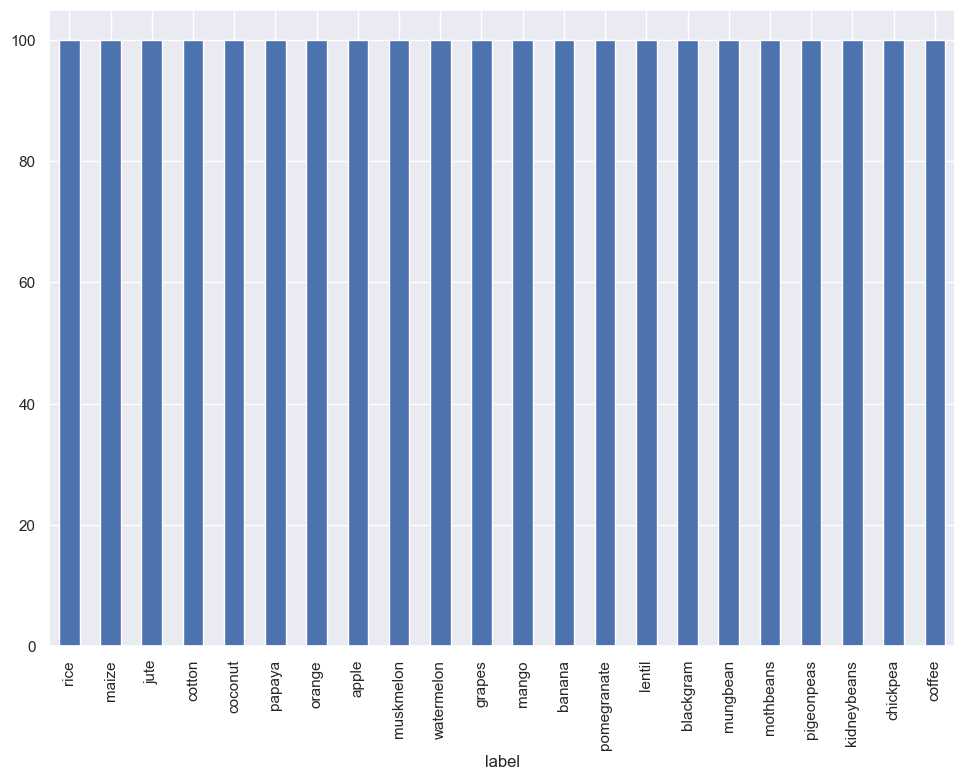

In [168]:
df1.label.value_counts().plot(kind='bar')

## Data Quality

### Check missing value

In [169]:
for i in range(len(df1.columns)):
    print('Attribute ',i,': ',df1.columns[i],'- Number of null value: ', df1[df1.columns[i]].isnull().sum())

Attribute  0 :  N - Number of null value:  0
Attribute  1 :  P - Number of null value:  0
Attribute  2 :  K - Number of null value:  0
Attribute  3 :  temperature - Number of null value:  0
Attribute  4 :  humidity - Number of null value:  0
Attribute  5 :  ph - Number of null value:  0
Attribute  6 :  rainfall - Number of null value:  0
Attribute  7 :  label - Number of null value:  0


### Check outliers

In [170]:
for i in range(len(df1.columns)):
    if pd.api.types.is_numeric_dtype(df1[df1.columns[i]]):
        col_name = df1.columns[i]
        print('\nAttribute-',i,'-',col_name,':',df1[col_name].dtype)
        Q1 = df1[col_name].quantile(0.25)
        print('Q1:', Q1)
        Q3 = df1[col_name].quantile(0.75)
        print('Q3:', Q3)
        IQR = Q3 - Q1
        print('IQR:', IQR)
        min = df1[col_name].min()
        max = df1[col_name].max()
        min_IQR = Q1-1.5*IQR
        max_IQR = Q3+1.5*IQR
        count_outliers = df1[(df1[col_name]<min_IQR) | (df1[col_name]>max_IQR)].shape[0]
        print('Number of outliers:', count_outliers)
        print('Total number of records:', df1[col_name].shape[0])
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute- 0 - N : int64
Q1: 21.0
Q3: 84.25
IQR: 63.25
Number of outliers: 0
Total number of records: 2200

Attribute- 1 - P : int64
Q1: 28.0
Q3: 68.0
IQR: 40.0
Number of outliers: 138
Total number of records: 2200
High outlier is found

Attribute- 2 - K : int64
Q1: 20.0
Q3: 49.0
IQR: 29.0
Number of outliers: 200
Total number of records: 2200
High outlier is found

Attribute- 3 - temperature : float64
Q1: 22.7693746325
Q3: 28.5616539325
IQR: 5.792279300000001
Number of outliers: 86
Total number of records: 2200
Low outlier is found
High outlier is found

Attribute- 4 - humidity : float64
Q1: 60.2619528025
Q3: 89.948770755
IQR: 29.6868179525
Number of outliers: 30
Total number of records: 2200
Low outlier is found

Attribute- 5 - ph : float64
Q1: 5.97169279925
Q3: 6.923642621250002
IQR: 0.9519498220000013
Number of outliers: 57
Total number of records: 2200
Low outlier is found
High outlier is found

Attribute- 6 - rainfall : float64
Q1: 64.55168599999999
Q3: 124.2675078
IQR: 59.715821

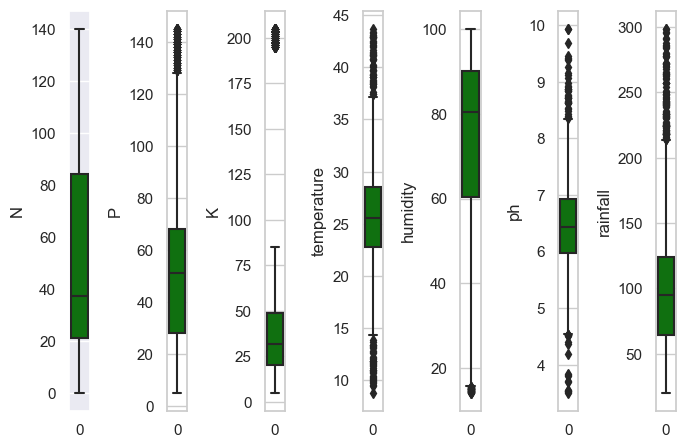

In [171]:
l = df1.columns.values
number_of_columns=8
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df1[l[i]],color='green',orient='v').set(ylabel=df1.columns[i])
    plt.tight_layout()

In [192]:
# check outliers per label 
for i in df1['label'].unique():
    d = df1['K'][df1['label']==i]
    Q1 = d.quantile(0.25)
    Q3 = d.quantile(0.75)
    IQR = Q3 - Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    print('Label:',i)
    print('Number of outliers:', d[(d<min_IQR) | (d>max_IQR)].shape[0])
    print('Total number of records:', d.shape[0])


Label: rice
Number of outliers: 0
Total number of records: 100
Label: maize
Number of outliers: 0
Total number of records: 100
Label: chickpea
Number of outliers: 0
Total number of records: 100
Label: kidneybeans
Number of outliers: 0
Total number of records: 100
Label: pigeonpeas
Number of outliers: 0
Total number of records: 100
Label: mothbeans
Number of outliers: 0
Total number of records: 100
Label: mungbean
Number of outliers: 0
Total number of records: 100
Label: blackgram
Number of outliers: 0
Total number of records: 100
Label: lentil
Number of outliers: 0
Total number of records: 100
Label: pomegranate
Number of outliers: 0
Total number of records: 100
Label: banana
Number of outliers: 0
Total number of records: 100
Label: mango
Number of outliers: 0
Total number of records: 100
Label: grapes
Number of outliers: 0
Total number of records: 100
Label: watermelon
Number of outliers: 0
Total number of records: 100
Label: muskmelon
Number of outliers: 0
Total number of records: 10

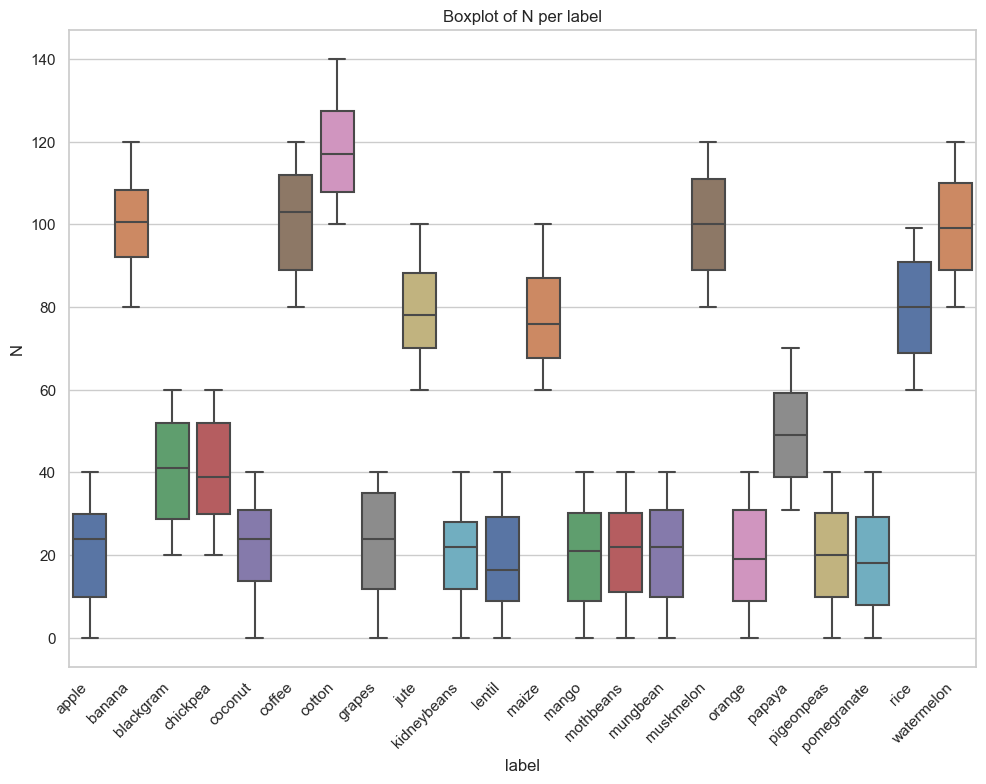

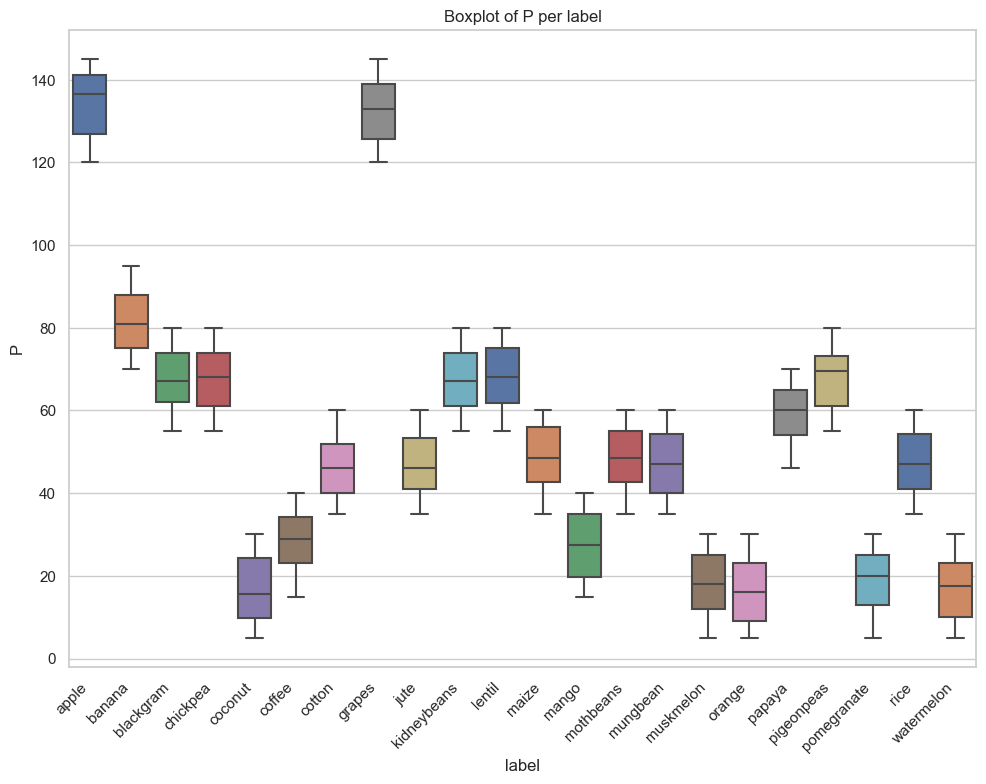

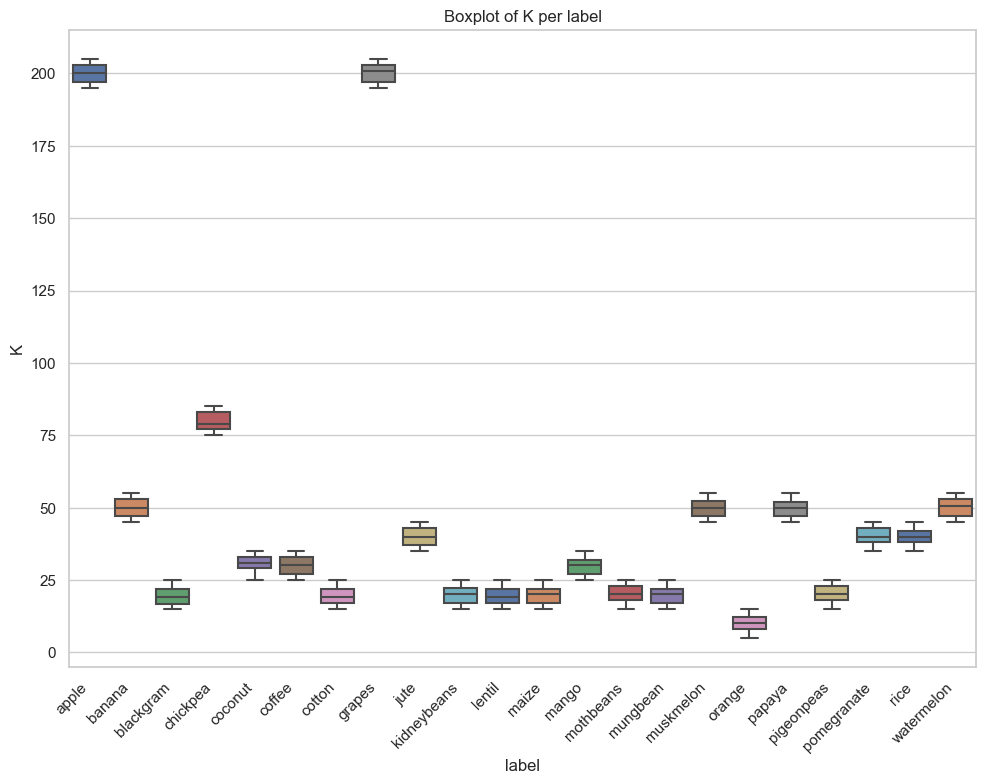

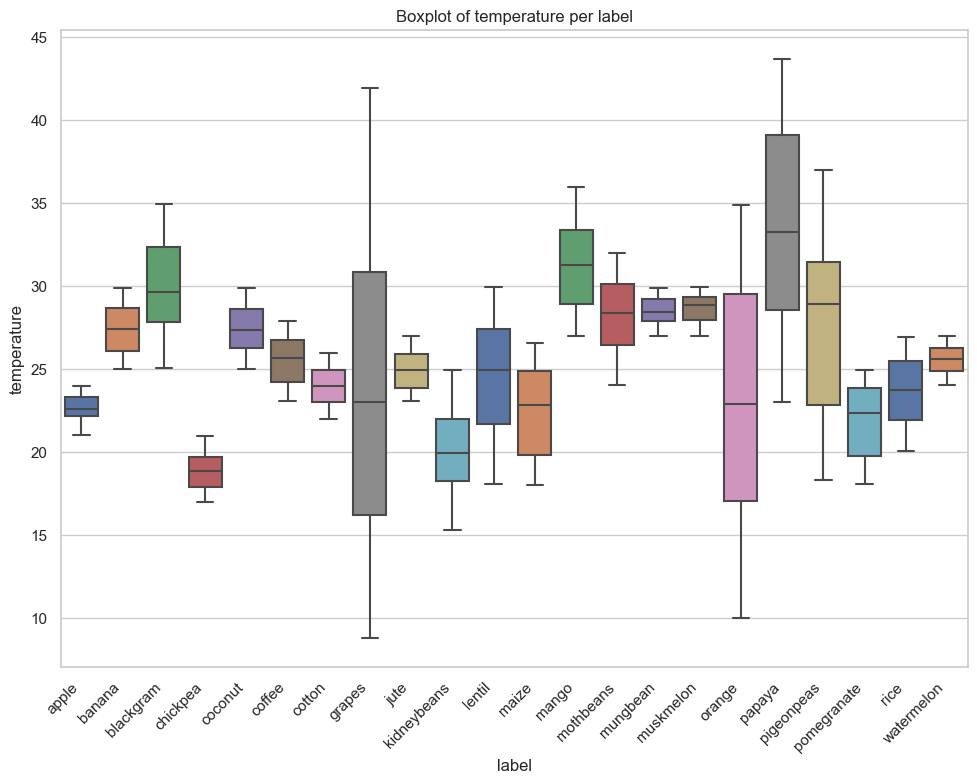

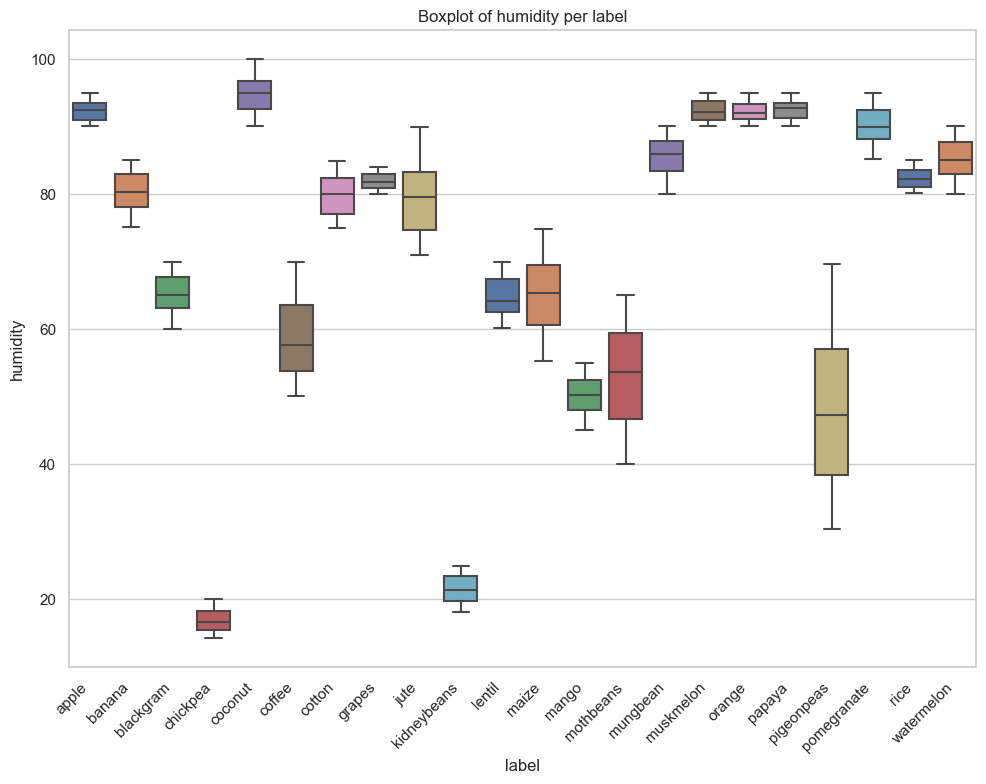

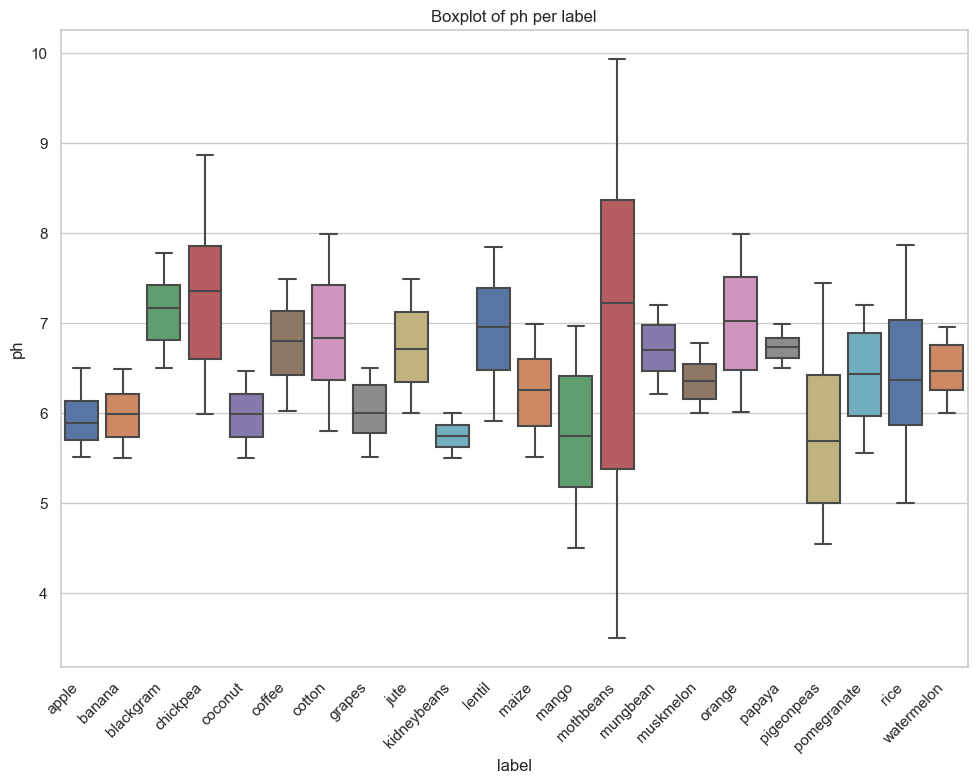

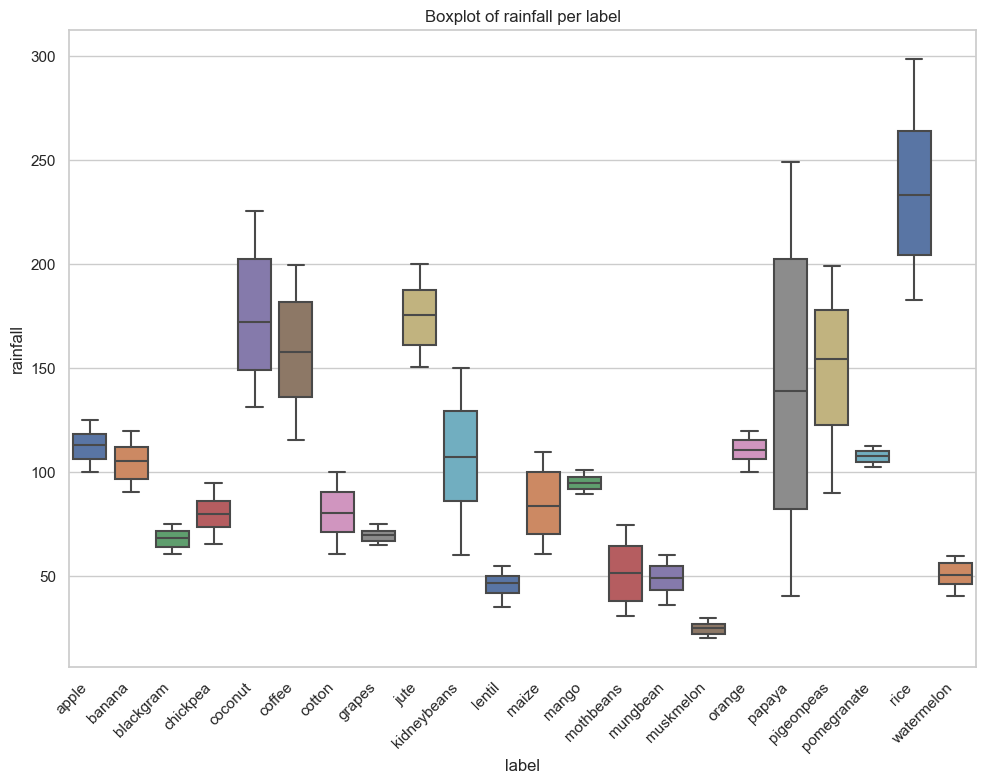

In [216]:
# boxplot per column per label
for i in df1.columns:
    if i!='label':
        ax = sns.boxplot(y=i, x='label', data=df1, palette="deep")
        ax.set_title('Boxplot of '+i+' per label')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.show()

### Check imbalance data

In [172]:
for i in df1.label.unique():
    print('Label: ',i,' - ',df1.label.value_counts()[i]/len(df1)*100,'%')

Label:  rice  -  4.545454545454546 %
Label:  maize  -  4.545454545454546 %
Label:  chickpea  -  4.545454545454546 %
Label:  kidneybeans  -  4.545454545454546 %
Label:  pigeonpeas  -  4.545454545454546 %
Label:  mothbeans  -  4.545454545454546 %
Label:  mungbean  -  4.545454545454546 %
Label:  blackgram  -  4.545454545454546 %
Label:  lentil  -  4.545454545454546 %
Label:  pomegranate  -  4.545454545454546 %
Label:  banana  -  4.545454545454546 %
Label:  mango  -  4.545454545454546 %
Label:  grapes  -  4.545454545454546 %
Label:  watermelon  -  4.545454545454546 %
Label:  muskmelon  -  4.545454545454546 %
Label:  apple  -  4.545454545454546 %
Label:  orange  -  4.545454545454546 %
Label:  papaya  -  4.545454545454546 %
Label:  coconut  -  4.545454545454546 %
Label:  cotton  -  4.545454545454546 %
Label:  jute  -  4.545454545454546 %
Label:  coffee  -  4.545454545454546 %


## Data Exploration / Visualization

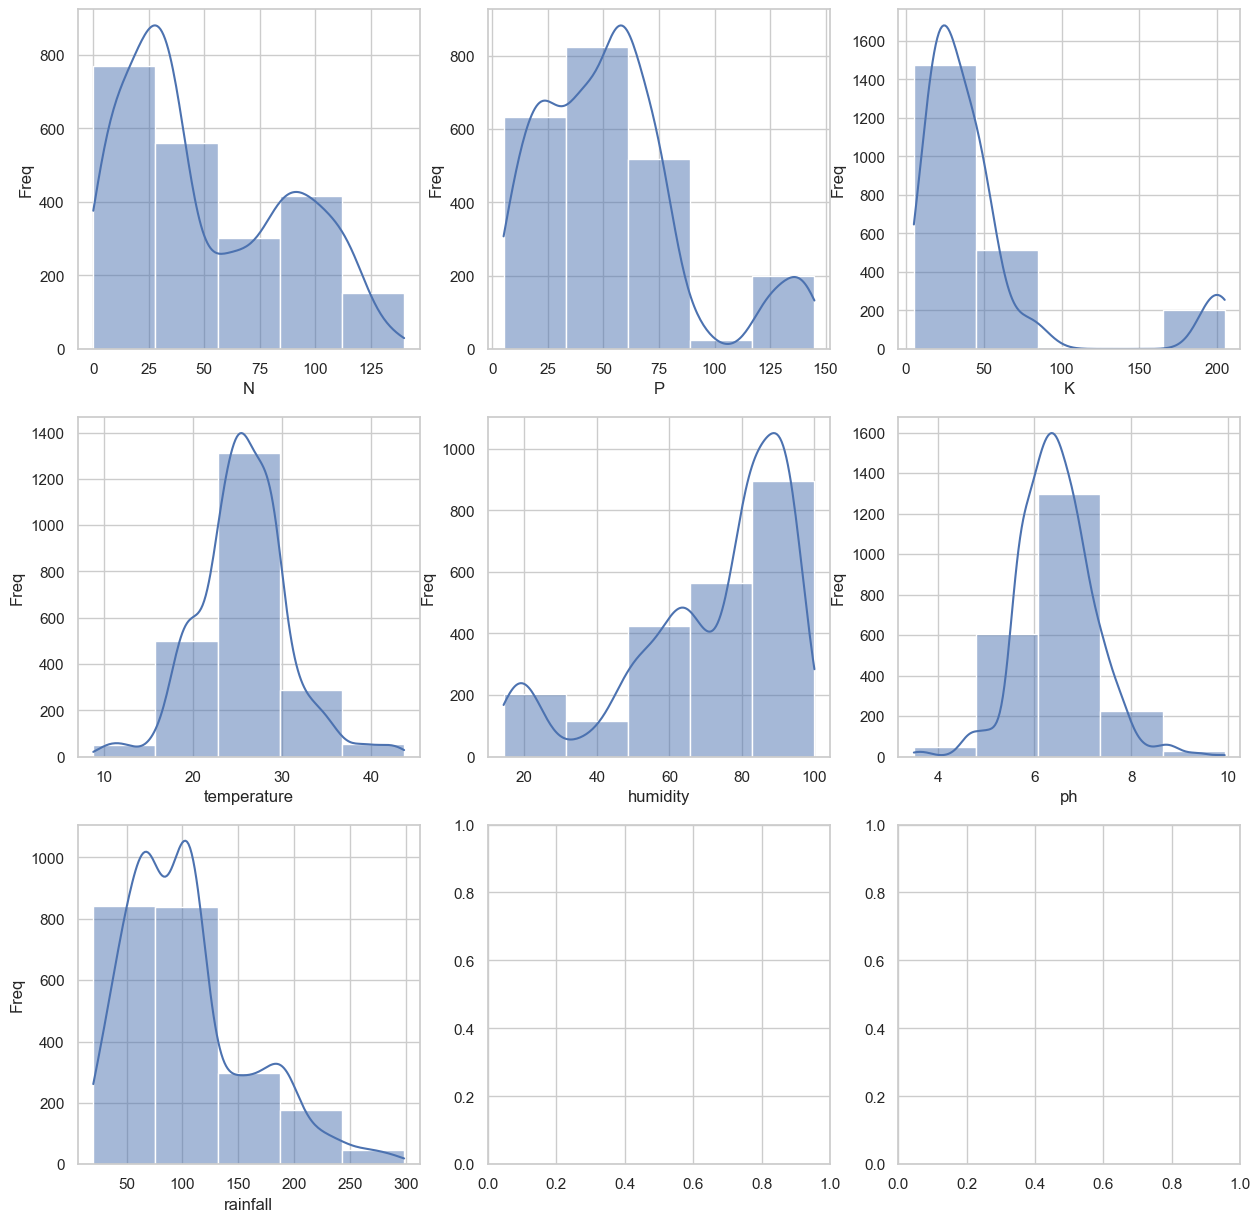

In [173]:
f,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i in range(len(df1.columns)-1):
    sns.histplot(df1[df1.columns[i]], kde=True, bins=5, ax=axes[i]).set(xlabel=df1.columns[i], ylabel='Freq')

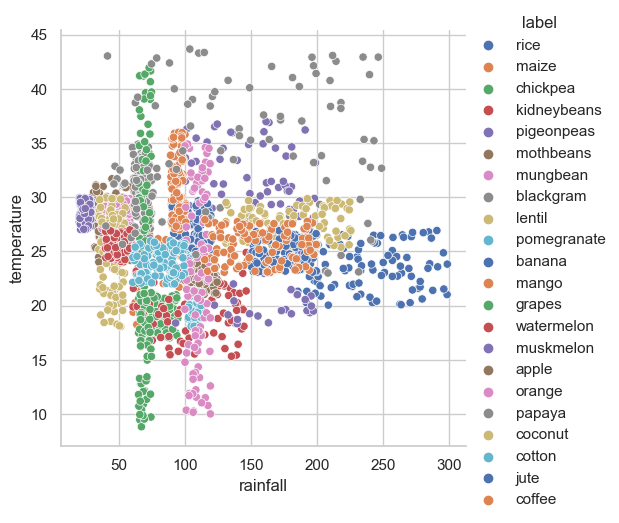

In [174]:
sns.relplot(x='rainfall',y='temperature',data=df1,kind='scatter',hue='label',height=5, palette='deep')

<Axes: >

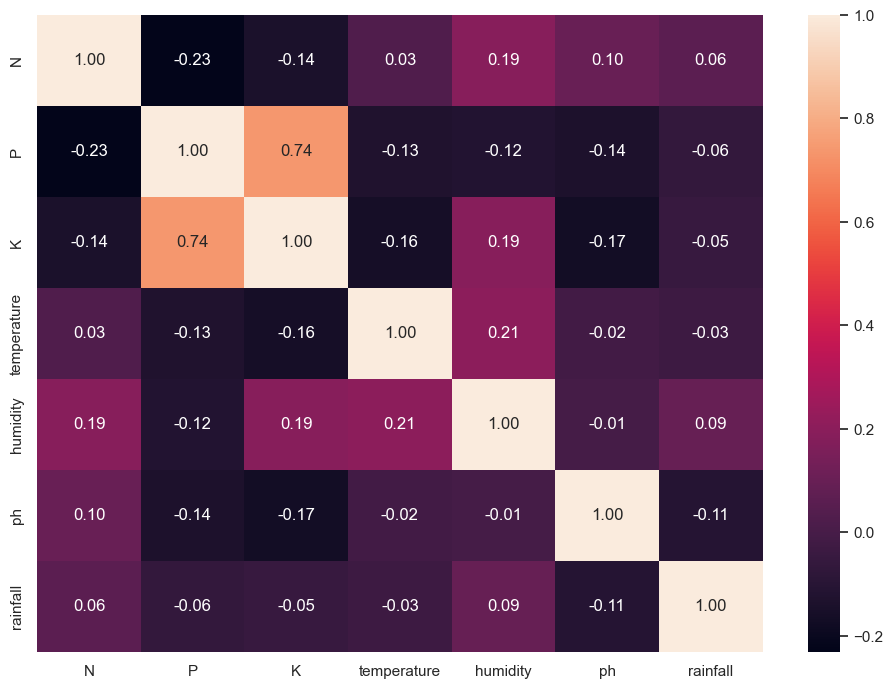

In [175]:
# Heat Map (Corr Coeff)
corr = df1.corr(numeric_only=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True, fmt='.2f')

Attribute  0 :  N - Skewness:  0.5097213691539147
Attribute  1 :  P - Skewness:  1.0107725431372674
Attribute  2 :  K - Skewness:  2.3751672388547
Attribute  3 :  temperature - Skewness:  0.18493273421137887
Attribute  4 :  humidity - Skewness:  -1.0917079195808679
Attribute  5 :  ph - Skewness:  0.2839294375729441
Attribute  6 :  rainfall - Skewness:  0.9657563536272812


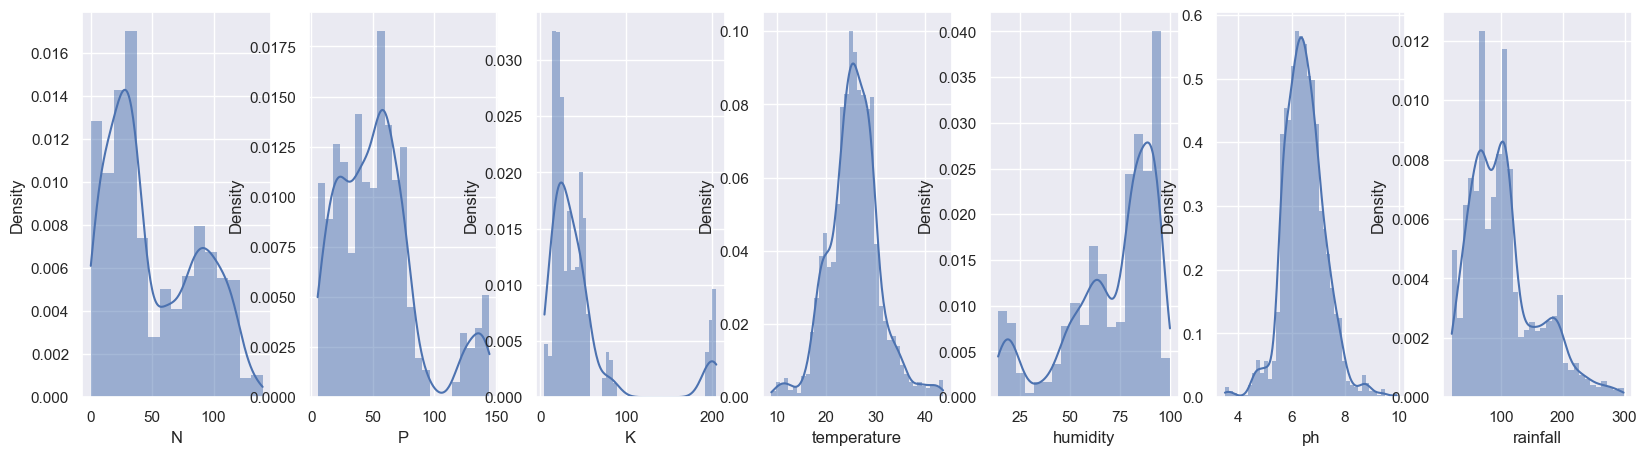

In [176]:
f,axes = plt.subplots(1,7,figsize=(20,5))
axes = axes.flatten()
for i in range(len(df1.columns)-1):
    # sns.kdeplot(df1[df1.columns[i]], ax=axes[i]).set(xlabel=df1.columns[i], ylabel='Density')
    sns.histplot(df1[df1.columns[i]], ax=axes[i], label="100% Equities", kde=True, stat="density", linewidth=0)

for i in range(len(df1.columns)-1):
    print('Attribute ',i,': ',df1.columns[i],'- Skewness: ', df1[df1.columns[i]].skew())


## Data Preprocessing

### Data Cleansing
- data types
- handling missing value
- exclude outlier

Tidak ditemukan missing value
Perhitungan outliers yang digunakan pada per column per fitur

In [177]:
df1['label'] = df1['label'].astype('category')
df1.dtypes

N                 int64
P                 int64
K                 int64
temperature     float64
humidity        float64
ph              float64
rainfall        float64
label          category
dtype: object

In [178]:
from scipy.stats.mstats import winsorize
from scipy.stats.mstats import trima

# for i in range(len(df1.columns)-1):
#     col_name = df1.columns[i]
#     Q1 = df1[col_name].quantile(0.25)
#     Q3 = df1[col_name].quantile(0.75)
#     IQR = Q3 - Q1
#     min_IQR = Q1-1.5*IQR
#     max_IQR = Q3+1.5*IQR
#     df1 = df1[(df1[col_name]>=min_IQR) & (df1[col_name]<=max_IQR)]
#     wins = winsorize(df1[col_name], limits=[0.1, 0.2])
    # trims = trima(df1[col_name], limits=(68, 250))

## Formating Data
- encoding categorical data

Tidak ada yang perlu diformating ulang

## Dimensionality reduction

## Feature Engineering
- feature generation/extraction/transformation
- feature selection

In [183]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df1.iloc[:,0:7]  #independent columns
Y = df1.iloc[:,-1]    #target column 

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 7 best features


         Specs          Score
2            K  116710.530813
6     rainfall   54808.131541
0            N   53144.698042
1            P   42500.133699
4     humidity   14755.489757
3  temperature    1092.422417
5           ph      74.886567


## Handling imbalance data
- undersampling
- oversampling

In [212]:
# sampling data for training for supervised learning (classification)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df1.iloc[:,0:7]
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1760, 7), (440, 7), (1760,), (440,))